# The Effect of Change of Link Weight
In this notebook, we will consider the effect of change of the weight of a link a in network on the eigenvalues of the
outer connection matrix $ \Xi $. The network considered here is
$$
\dot{x}_i = f(x)_i - \epsilon \sum_{j = 1}^n \xi_{ij} P x_j \quad i = 1, 2, \ldots,n
$$
Here $ \Xi = [\xi_{ij}] $ is the outer connection matrix. Since the network is connected, $ \Xi $ has eigenvalues $ 0 =
\lambda_1 < \lambda_2 \leq \lambda_3 \leq \ldots \leq \lambda_n $. As an example, consider following network.

Load the packages

In [1]:
using LightGraphs
using GraphPlot

Construct the network

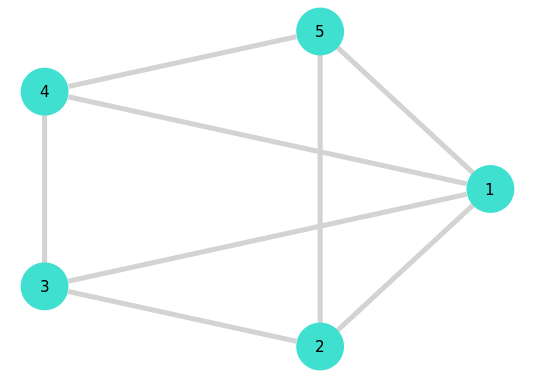

In [2]:
n = 5   # Number of nodes in the network
gr = cycle_graph(n)
add_edge!(gr, 1, 3)
add_edge!(gr, 1, 4)
add_edge!(gr, 2, 5)
gplot(gr, nodelabel=1:nv(gr), layout = circular_layout)

The outer connection matrix of the network is

In [3]:
W = collect(laplacian_matrix(gr)) .|> float

5×5 Matrix{Float64}:
  4.0  -1.0  -1.0  -1.0  -1.0
 -1.0   3.0  -1.0   0.0  -1.0
 -1.0  -1.0   3.0  -1.0   0.0
 -1.0   0.0  -1.0   3.0  -1.0
 -1.0  -1.0   0.0  -1.0   3.0

Let us rescale the matrix such elements on the main diagonal are 1.

In [4]:
function scale(W0)
    W = copy(W0)
    for i in 1 : size(W, 1)
        W[i, :] ./=  W[i, i]
    end
    W
end
Ξ =  scale(W)

5×5 Matrix{Float64}:
  1.0       -0.25      -0.25      -0.25      -0.25
 -0.333333   1.0       -0.333333   0.0       -0.333333
 -0.333333  -0.333333   1.0       -0.333333   0.0
 -0.333333   0.0       -0.333333   1.0       -0.333333
 -0.333333  -0.333333   0.0       -0.333333   1.0

Note that the network has a symmetry corresponding to the permutation matrix.

In [5]:
Q = [
    1 0 0 0 0;
    0 0 0 0 1;
    0 0 0 1 0;
    0 0 1 0 0;
    0 1 0 0 0
]

5×5 Matrix{Int64}:
 1  0  0  0  0
 0  0  0  0  1
 0  0  0  1  0
 0  0  1  0  0
 0  1  0  0  0

 Let $ M^{-1} Q M = Q^\prime $ be eigendecomposiion of $ Q $. Then $ M $ can be found as

In [6]:
using LinearAlgebra
M = eigvecs(Q)

5×5 Matrix{Float64}:
  0.0        0.0       0.0       1.0  0.0
  0.0       -0.707107  0.0       0.0  0.707107
  0.707107   0.0       0.707107  0.0  0.0
 -0.707107   0.0       0.707107  0.0  0.0
  0.0        0.707107  0.0       0.0  0.707107

Using $ M $, $ \Xi $ can be transformed as

In [7]:
G = inv(M) * Q * M

5×5 Matrix{Float64}:
 -1.0           0.0          -2.78178e-16  0.0   0.0
  0.0          -1.0           0.0          0.0  -3.13396e-16
 -3.13396e-16   0.0           1.0          0.0   0.0
  0.0           0.0           0.0          1.0   0.0
  0.0          -2.78178e-16   0.0          0.0   1.0

which is a block diagonal matrix in the form of
$$
G =
\begin{bmatrix}
B & 0 \\
0 & D \\
\end{bmatrix}
$$
Then, we have

In [8]:
B = Q[1 : 2, 1 : 2]

2×2 Matrix{Int64}:
 1  0
 0  0

In [9]:
D = Q[3 : 5, 3 : 5]

3×3 Matrix{Int64}:
 0  1  0
 1  0  0
 0  0  0

The eigenvalues of $ B $ and $ D $ are,

In [10]:
λB =  eigvals(B)

2-element Vector{Float64}:
 0.0
 1.0

-

In [11]:
λD = eigvals(D)

3-element Vector{Float64}:
 -1.0
  0.0
  1.0

Since $ 0 $ is the eigenvalue of $ D $, the subspace corresponding to $ D $ is the syncronization subspace and that
corresponding to $ B $ is transversal subspace. Let the corresponding eigenvalues be
* $0 = \lambda_1^{syn} < \lambda_2^{syn} \leq \lambda_3^{syn} $
* $\lambda_1^{tr} \leq \lambda_2^{tr} $

Now let us sweep the coupling between the nodes 2 and 5 and observe the change of eigenvalues of $ B $ and $ D $.

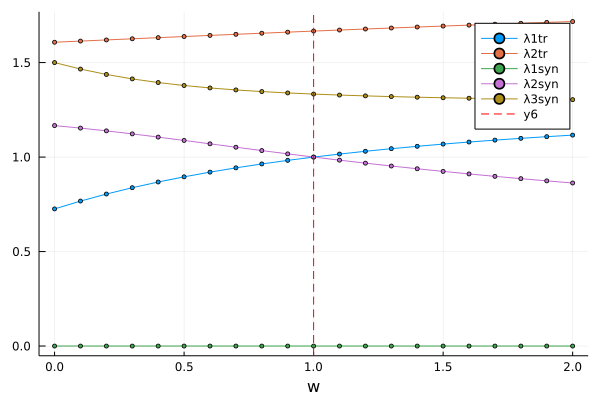

In [12]:
function sweepweight(w, W, M)
    λB = Vector{Vector{Float64}}(undef, length(w))
    λD = Vector{Vector{Float64}}(undef, length(w))
    for (i, wi) in enumerate(w)
        W[2, 5] = W[5, 2] =  -wi
        W[2, 2] -= sum(W[2, :])
        W[5, 5] -= sum(W[5, :])
        Ξ = scale(W)
        G = inv(M) * Ξ * M
        B = G[1 : 2, 1 : 2]
        D = G[3 : 5, 3 : 5]
        λB[i] = eigvals(B)
        λD[i] = eigvals(D)
    end
    λB, λD
end

w = collect(0 : 0.1 : 2)
λB, λD = sweepweight(w, W, M)

using Plots
theme(:default)
marker = (:circle, 3)
plot(w, getindex.(λB, 1), marker=marker, label="λ1tr")
plot!(w, getindex.(λB, 2), marker=marker,  label="λ2tr")
plot!(w, getindex.(λD, 1), marker=marker,  label="λ1syn")
plot!(w, getindex.(λD, 2), marker=marker,  label="λ2syn")
plot!(w, getindex.(λD, 3), marker=marker,  label="λ3syn")
vline!([1.], color="red", linestyle=:dash)
xlabel!("w")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*